## Practical Work 3

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [4]:
x=np.linspace(0, 20, num=20)
x

array([ 0.        ,  1.05263158,  2.10526316,  3.15789474,  4.21052632,
        5.26315789,  6.31578947,  7.36842105,  8.42105263,  9.47368421,
       10.52631579, 11.57894737, 12.63157895, 13.68421053, 14.73684211,
       15.78947368, 16.84210526, 17.89473684, 18.94736842, 20.        ])

In [5]:
y=-2*x+1
y

array([  1.        ,  -1.10526316,  -3.21052632,  -5.31578947,
        -7.42105263,  -9.52631579, -11.63157895, -13.73684211,
       -15.84210526, -17.94736842, -20.05263158, -22.15789474,
       -24.26315789, -26.36842105, -28.47368421, -30.57894737,
       -32.68421053, -34.78947368, -36.89473684, -39.        ])

#### Plot your data points. 

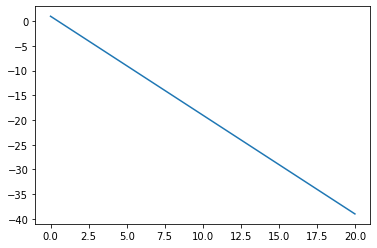

In [13]:
plt.plot(x,y)
plt.show()

#### Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Coose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph) , best fit line)

In [14]:
alpha=0.001
i=1000
theta_0=[]
theta_1=[]
loss=[]
H=[]
def GD (x,y,alpha,i):
    theta0,theta1=0,0
    m=len(x)
    theta_0.append(theta0) 
    theta_1.append(theta1)
    h=theta0+theta1*x
    H.append(h)
    j=np.sum(np.power(h-y, 2))/(2*m)
    loss.append(j)
    #print(theta_0,theta_1,loss)

    for n in range(i):
        h=theta0+theta1*x
        H.append(h)
        j=np.sum(np.power(h-y, 2))/(2*m)
        loss.append(j)

        g0=np.sum(h-y)/m
        g1=np.sum((h-y)*x)/m
        #stop criteria 
        #if g0<0.0001 or g1<0.0001 or loss[i]==loss[i-1]==0:
          #  break

        theta0=theta0-alpha*g0
        theta_0.append(theta0)
        theta1=theta1-alpha*g1
        theta_1.append(theta1)
        print(theta_0 )
        print(theta_1 )
        print(loss)
        print(theta_0[-1])
        print(theta_1[-1])
        
        
    return H



In [15]:
H=GD (x,y,0.001,1000)
print(H[-1])


[0, -0.019]
[0, -0.2636842105263158]
[254.18421052631578, 254.18421052631578]
-0.019
-0.2636842105263158
[0, -0.019, -0.03534415789473684]
[0, -0.2636842105263158, -0.4910953185595568]
[254.18421052631578, 254.18421052631578, 189.10140034254263]
-0.03534415789473684
-0.4910953185595568
[0, -0.019, -0.03534415789473684, -0.049397860551246536]
[0, -0.2636842105263158, -0.4910953185595568, -0.6872235702303542]
[254.18421052631578, 254.18421052631578, 189.10140034254263, 140.6942090832943]
-0.049397860551246536
-0.6872235702303542
[0, -0.019, -0.03534415789473684, -0.049397860551246536, -0.06147622698839175]
[0, -0.2636842105263158, -0.4910953185595568, -0.6872235702303542, -0.8563726820143722]
[254.18421052631578, 254.18421052631578, 189.10140034254263, 140.6942090832943, 104.68997758421786]
-0.06147622698839175
-0.8563726820143722
[0, -0.019, -0.03534415789473684, -0.049397860551246536, -0.06147622698839175, -0.07185102394125964]
[0, -0.2636842105263158, -0.4910953185595568, -0.687223570

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [16]:
from sklearn.metrics import r2_score
r2_score(y, H[-1])

0.9986088346319381

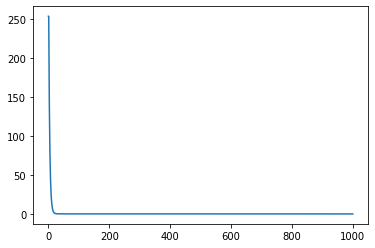

In [17]:
iters=np.linspace(0, 1000, num=1001)
plt.plot(iters,loss)
plt.show()

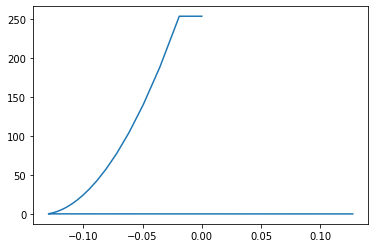

In [18]:
plt.plot(theta_0,loss)
plt.show()

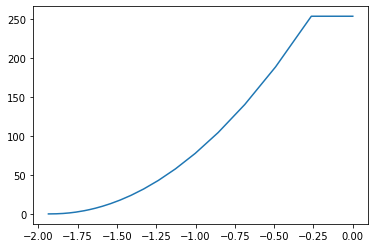

In [19]:
plt.plot(theta_1,loss)
plt.show()

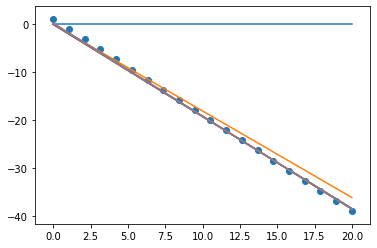

In [20]:
plt.plot(x,H[0])
plt.plot(x,H[20])
plt.plot(x,H[50])
plt.plot(x,H[100])
plt.plot(x,H[300])
plt.plot(x,H[500])
plt.plot(x,H[800])
plt.plot(x,H[1000])

plt.scatter(x,y)

plt.show()


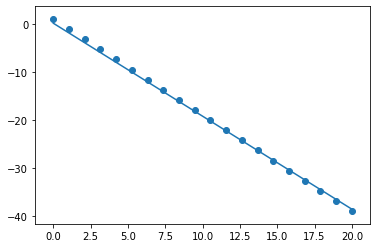

In [21]:
plt.plot(x,H[-1])
plt.scatter(x,y)

plt.show()


### Update your Batch GD for one variable  implementation to be Momentum-Based GD and check your results

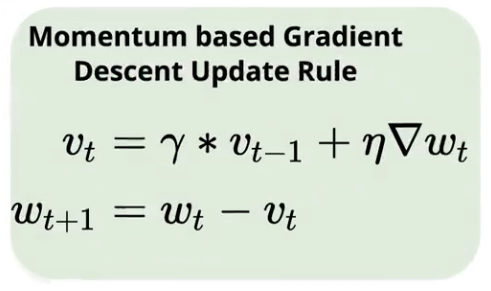

#### γ takes values between 0 and 1.
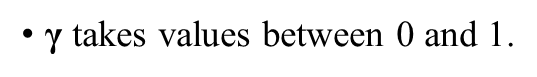

In [72]:
gama=0.1
alpha=0.001
i=1000
theta_0=[]
theta_1=[]
loss=[]
H1=[]
def momentum (x,y,alpha,gama,i):
    Vt01,Vt11=0,0
    theta0,theta1=0,0
    m=len(x)
    theta_0.append(theta0) 
    theta_1.append(theta1)
    h=theta0+theta1*x
    H1.append(h)
    j=np.sum(np.power(h-y, 2))/(2*m)
    loss.append(j)

    for n in range(i):
        h=theta0+theta1*x
        H1.append(h)
        j=np.sum(np.power(h-y, 2))/(2*m)
        loss.append(j)

        g0=np.sum(h-y)/m
        g1=np.sum((h-y)*x)/m

        Vt0=gama*Vt01+alpha*g0 
        theta0=theta0-Vt0
        theta_0.append(theta0) 

        Vt1=gama*Vt11+alpha*g1 
        theta1=theta1-Vt1
        theta_1.append(theta1)
            #stop criteria 
            #if g0<0.0001 or g1<0.0001 or loss[i]==loss[i-1]==0:
              #  break

    return H1
momentum (x,y,alpha,gama,i)

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]),
 array([-0.019     , -0.29656233, -0.57412465, -0.85168698, -1.12924931,
        -1.40681163, -1.68437396, -1.96193629, -2.23949861, -2.51706094,
        -2.79462327, -3.0721856 , -3.34974792, -3.62731025, -3.90487258,
        -4.1824349 , -4.45999723, -4.73755956, -5.01512188, -5.29268421]),
 array([-0.03534416, -0.5522866 , -1.06922904, -1.58617148, -2.10311392,
        -2.62005636, -3.1369988 , -3.65394124, -4.17088368, -4.68782612,
        -5.20476856, -5.721711  , -6.23865344, -6.75559589, -7.27253833,
        -7.78948077, -8.30642321, -8.82336565, -9.34030809, -9.85725053]),
 array([ -0.04939786,  -0.77279109,  -1.49618432,  -2.21957756,
         -2.94297079,  -3.66636402,  -4.38975725,  -5.11315048,
         -5.83654372,  -6.55993695,  -7.28333018,  -8.00672341,
         -8.73011664,  -

In [73]:
from sklearn.metrics import r2_score
r2_score(y, H1[-1])

0.9986088346319381

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

In [81]:
H2=momentum (x,y,0.001,0,1000)
print(H2[-1])


[  0.12737634  -1.9106303   -3.94863694  -5.98664358  -8.02465022
 -10.06265686 -12.1006635  -14.13867015 -16.17667679 -18.21468343
 -20.25269007 -22.29069671 -24.32870335 -26.36670999 -28.40471663
 -30.44272328 -32.48072992 -34.51873656 -36.5567432  -38.59474984]


In [82]:
H3=momentum (x,y,0.001,0.1,1000)
print(H3[-1])


[  0.12737634  -1.9106303   -3.94863694  -5.98664358  -8.02465022
 -10.06265686 -12.1006635  -14.13867015 -16.17667679 -18.21468343
 -20.25269007 -22.29069671 -24.32870335 -26.36670999 -28.40471663
 -30.44272328 -32.48072992 -34.51873656 -36.5567432  -38.59474984]


In [83]:
H4=momentum (x,y,0.001,0.9,1000)
print(H4[-1])


[  0.12737634  -1.9106303   -3.94863694  -5.98664358  -8.02465022
 -10.06265686 -12.1006635  -14.13867015 -16.17667679 -18.21468343
 -20.25269007 -22.29069671 -24.32870335 -26.36670999 -28.40471663
 -30.44272328 -32.48072992 -34.51873656 -36.5567432  -38.59474984]


In [84]:
from sklearn.metrics import r2_score
r2_score(y, H2[-1])

0.9986088346319381

In [85]:
from sklearn.metrics import r2_score
r2_score(y, H3[-1])

0.9986088346319381

In [86]:
from sklearn.metrics import r2_score
r2_score(y, H4[-1])

0.9986088346319381

### Update your Batch GD for one variable  implementation to be NAG and check your results

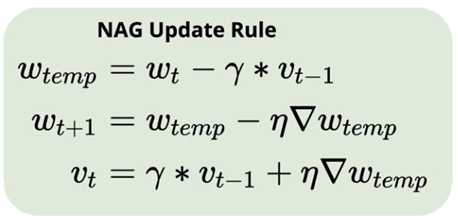

In [7]:
gama=0.5
alpha=0.001
i=1000
theta_0=[]
theta_1=[]
loss=[]
H2=[]
def NAG (x,y,alpha,gama,i):
    Vt01,Vt11,theta_temp0,theta_temp1=0,0,0,0
    theta0,theta1=0,0
    m=len(x)
    theta_0.append(theta_temp0) 
    theta_1.append(theta_temp1)
    h=theta_temp0+theta_temp1*x
    H2.append(h)
    j=np.sum(np.power(h-y, 2))/(2*m)
    loss.append(j)

    for n in range(i):
        h=theta_temp0+theta_temp1*x
        H2.append(h)
        j=np.sum(np.power(h-y, 2))/(2*m)
        loss.append(j)

        g0=np.sum(h-y)/m
        g1=np.sum((h-y)*x)/m
        #stop criteria 
        #if g0<0.0001 or g1<0.0001 or loss[i]==loss[i-1]==0:
          #  break

        theta_temp0=theta0-gama*Vt01
        theta0=theta_temp0-alpha*g0
        Vt0=gama*Vt01+alpha*g0  
        theta_0.append(theta_temp0)

        theta_temp1=theta1-gama*Vt11
        theta1=theta_temp1-alpha*g1
        Vt1=gama*Vt11+alpha*g1  
        theta_1.append(theta_temp1)
            #stop criteria 
            #if g0<0.0001 or g1<0.0001 or loss[i]==loss[i-1]==0:
              #  break

    return H2
NAG (x,y,alpha,gama,i)

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]),
 array([-0.019     , -0.29656233, -0.57412465, -0.85168698, -1.12924931,
        -1.40681163, -1.68437396, -1.96193629, -2.23949861, -2.51706094,
        -2.79462327, -3.0721856 , -3.34974792, -3.62731025, -3.90487258,
        -4.1824349 , -4.45999723, -4.73755956, -5.01512188, -5.29268421]),
 array([ -0.038     ,  -0.59312465,  -1.14824931,  -1.70337396,
         -2.25849861,  -2.81362327,  -3.36874792,  -3.92387258,
         -4.47899723,  -5.03412188,  -5.58924654,  -6.14437119,
         -6.69949584,  -7.2546205 ,  -7.80974515,  -8.36486981,
         -8.91999446,  -9.47511911, -10.03024377, -10.58536842]),
 array([ -0.05434416,  -0.84884893,  -1.64335369,  -2.43785846,
         -3.23236323,  -4.

In [8]:
O=NAG (x,y,0.001,0.5,1000)
print(O[-1])


[  0.12720505  -1.91078839  -3.94878183  -5.98677526  -8.0247687
 -10.06276214 -12.10075558 -14.13874902 -16.17674246 -18.2147359
 -20.25272934 -22.29072278 -24.32871622 -26.36670966 -28.4047031
 -30.44269654 -32.48068998 -34.51868341 -36.55667685 -38.59467029]


In [10]:
O1=NAG (x,y,0.001,0.1,1000)
print(O1[-1])


[  0.12720505  -1.91078839  -3.94878183  -5.98677526  -8.0247687
 -10.06276214 -12.10075558 -14.13874902 -16.17674246 -18.2147359
 -20.25272934 -22.29072278 -24.32871622 -26.36670966 -28.4047031
 -30.44269654 -32.48068998 -34.51868341 -36.55667685 -38.59467029]


In [11]:
O2=NAG (x,y,0.001,0.9,1000)
print(O2[-1])


[  0.12720505  -1.91078839  -3.94878183  -5.98677526  -8.0247687
 -10.06276214 -12.10075558 -14.13874902 -16.17674246 -18.2147359
 -20.25272934 -22.29072278 -24.32871622 -26.36670966 -28.4047031
 -30.44269654 -32.48068998 -34.51868341 -36.55667685 -38.59467029]


In [12]:
from sklearn.metrics import r2_score
r2_score(y, O[-1])

0.9986082884207949

In [13]:
from sklearn.metrics import r2_score
r2_score(y, O1[-1])

0.9986082884207949

In [14]:
from sklearn.metrics import r2_score
r2_score(y, O2[-1])

0.9986082884207949